# <center>  Python for biologists

## Lecture 23, Parallel programming
20.04.2024


> Nikita Vaulin, vaulin@ro.ru, tg: @nvaulin

---

In [2]:
import requests
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Параллельное программирование 

**Параллельное программирование** - это способ сделать так, чтобы различные части программы исполнялись одновременно.

У ПП есть 2 цели:
 + Повышение интерактивности
 + Ускорение работы программы


## Немного терминологии

### Кишки компьютера

**CPU (Central Processing Unit)** - центральный процессор. Это "мозг" компьютера, в нём проходят все вычислительные операции, необходимые для работы устройства. Процессоры бывают не только в компьютерах, сейчас их можно встретить в любых электронных приборах: телефонах, автомобилях, бытовой технике и т.д. Однако в компьютерах установлены самые мощные и самые сложные CPU для решения любых задач. Современные CPU также раделены на **ядра**, которые по сути являются отдельными самостоятельными процессорами.

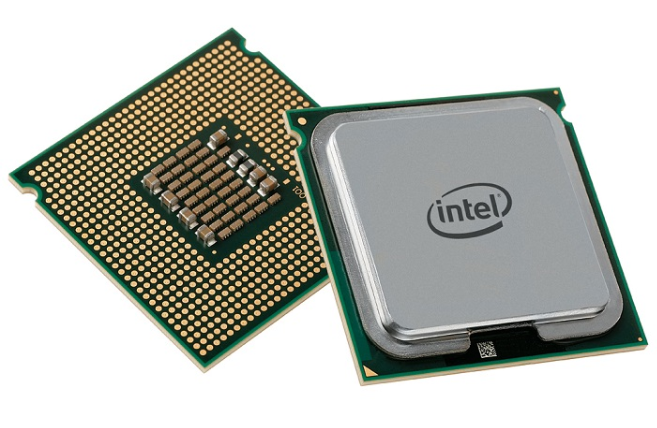

Вот так выглядит процессор. Снизу у него позолоченные контакты, а сверху теплораспределительная крышка.

Если заглянуть под крышку, то мы увидим маленький зеркальный прямоугольник - это чип процессора - кремниевый кристалл, на котором расположены все микросхемы.

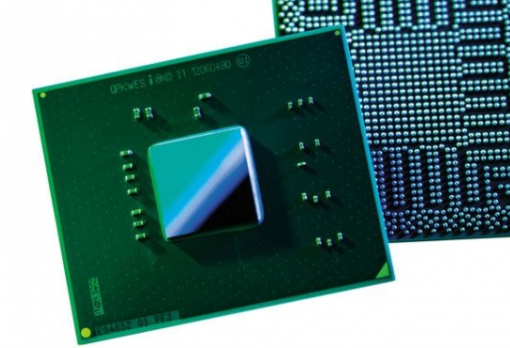

А вот так выглядит чип под микроскопом. Ярко выраженные большие голубые прямоугольники - ядра. На самом деле чип не разноцветный, но если на него попадает свет, то мы видим вот такие занимательные оптические эффекты.

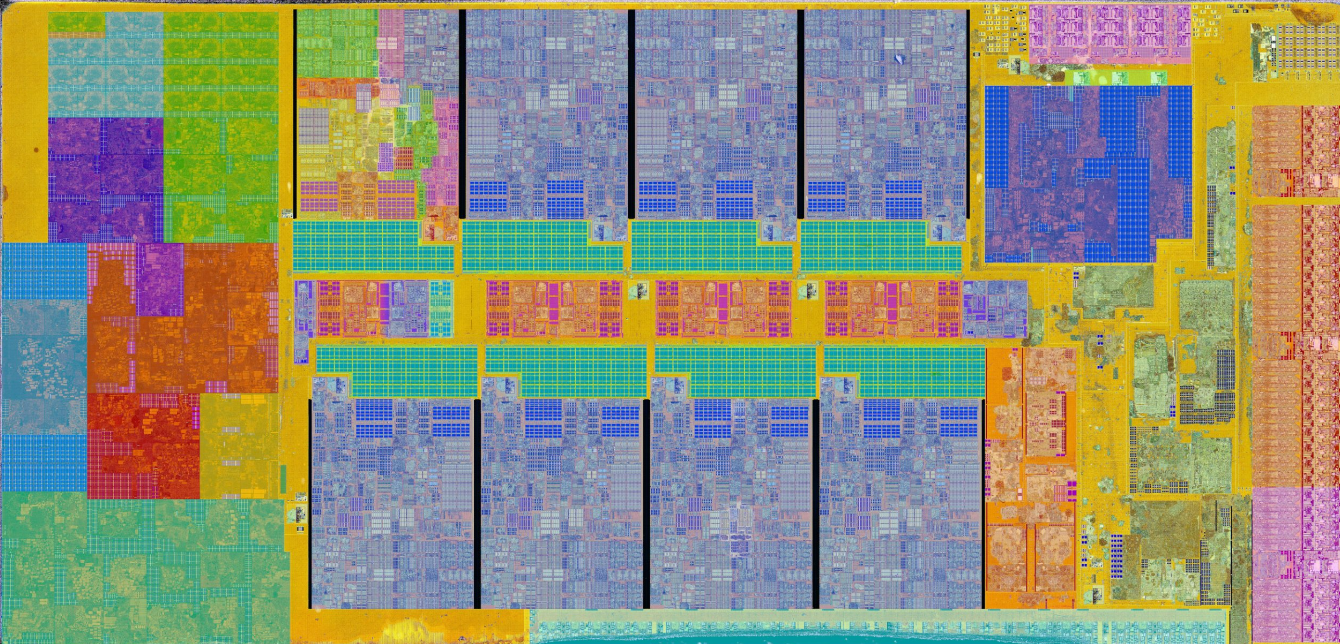

**Оперативная память (RAM, Random Access Memory, ОЗУ, Оперативное Запоминающее Устройство)** - особый вид хранилища информации, сильно отличающийся от привычных нам жёстких дисков. Если снова проводить аналогию с нашим организмом, то ОЗУ это кратковременная память. Как мы уже знаем, процессор производит различные вычислительные операции, но эти вычисления должны происходить с использованием каких-нибудь данных. Эти данные процессор получает из оперативной памяти. Информация из неё используется непосредственно процессором. Процессор никогда не считывает данные напрямую с диска. Данные всегда сначала загружаются с диска в оперативную память, а оттуда уже в процессор. Жёсткий диск же является своего рода долговременной памятью. Поэтому, чтобы произвести вычисления, компьютер должен сначала "вспомнить" информацию (то есть перевести её с жёсткого диска в ОЗУ), а после вычислений сделать всё в обратном порядке, чтобы не забыть результаты. Оперативная память очень быстрая, скорость чтения и записи для которой в десятки и сотни раз превосходят скорость записи на самые быстрые жёсткие диски. Благодаря этому процессор может практически мгновенно получать доступ к данным. Если бы оперативной памяти не было, компьютеры работали бы крайне медленно. Однако ОЗУ имеет один недостаток - всё её содержимое стирается при прекращении подачи энергии, поэтому при перезагрузке компьютера ОЗУ очищается. Обычно объём оперативной памяти для домашних компьютеров и ноутбуков находится в промежутке от 2 до 16 ГБ. Далее мы будем называть её просто "**память**".

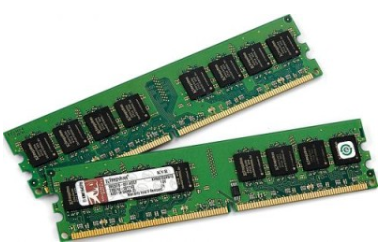

Вот так выглядит оперативная память.

**Инструкции** - команды для процессора, они также хранятся в памяти. Например, "возьми число из памяти по этому адресу", "сложи два числа", "запиши результат в память". Процессор выполняет инструкции последовательно.

**Программа** - набор инструкций для процессора, которые нужно выполнить для какой-то задачи

### Процессы и потоки


- **Процесс** это некоторый экземпляр выполняющейся программы. Процесс содержит набор **инструкций**, которые нужно выполнить. Они хранятся в специально выделенной для этого процесса памяти &mdash; **виртуальной памяти** (**virtual memory**), также в этой области памяти хранятся все данные, загруженные c диска или созданные в процессе выполнения. Инструкции процесса исполняются на ядрах центрального процессора (CPU).

    То есть **virtual memory** - это часть памяти, выделенная под процесс.

    Говоря немного сложнее, виртуальная память отображается на физическую. Она может ссылаться как на оперативную память, так и на диск. То есть процесс вообще не подозревает о том, что существует оперативная память и жёсткий диск. Для него есть **одна цельная виртуальная память**, однако при обращении к каким-либо данным в виртуальной памяти процесс будет в итоге обращаться к физической памяти, но он сам не будет об этом знать. Виртуальная память может выделяться как в оперативной памяти, так и на жёстком диске. Говоря совсем умными словами, **virtual memory** это абстракция над физической памятью. Рисунок ниже иллюстрирует это

    Обращение за пределы выделенной памяти (красная зона на рисунке) приводит к ошибкe **Segmentation Fault**.

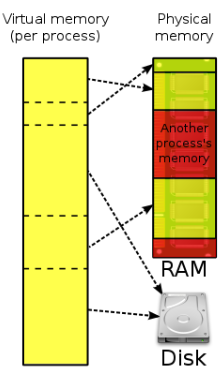

 - **Поток** представляет из себя минимальную единицу исполнения программы. В простейшем случае все инструкции процесса последовательно исполняются на CPU, этот набор инструкций по сути и является **потоком**. Все потоки имеют равноправный доступ к вирутальной памяти своео процесса.
 
 Таким образом у процессов память индивидуальная, а у потоков (в рамках одного процесса) - общая (shared)

Снова проводя аналогию с тем, что CPU это "мозг", можно представить, что поток это некоторая **мысль**. То есть последовательность операций, произведённых мозгом. Например, у нас есть задача "вычислить 2 + 2 * 3". Наш мозг будет действовать с следующем порядке: определит приоритет операций, умножит 2 на 3, сложит 6 и 2, положит результат 8 в кратковременную память и, если нужно, в долговременную. Эта последовательность действий является потоком. 

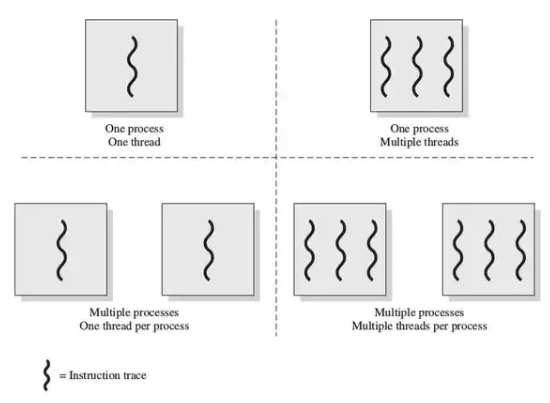

На картинке хорошо видно, что **потоки всегда являются частью процесса**. При этом в рамках одного процесса может существовать много потоков.

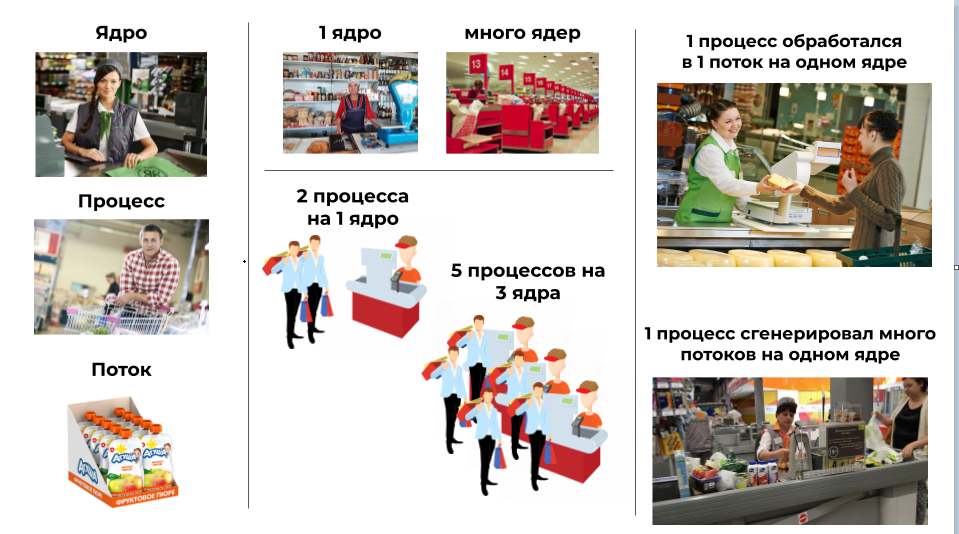

### Как работает многозадачность

**Многозадачность** &mdash; это свойство ОС выполнять одновременно несколько программ

Сначала нужно сделать маленькое уточнение. **Одновременно на одном ядре CPU может выполняться не более одного потока (то есть набора инструкций)**, пока что просто запомним это

Мы с вами привыкли использовать большое количество программ при работе за компьютером (браузер, telegram, тестовый редактор и т.д.) и всё это способно работать одновременно. Как же наш компьютер способен выполнять множество программ параллельно?

Логичным ответом будет: *"у центрального процессора имеется несколько ядер, которые работают как самостоятельные процессоры, поэтому каждое из них способно выполнять свой набор инструкций: первое ядро - браузер, второя ядро - telegram и т.д."*. Однако это ответ является правильным лишь отчасти.

Допустим у нас открыто не 4 программы, а 10, в то время как мы имеем 2-ядерный процессор. Тем не менее все они по прежнему будут работать параллельно.

К тому же возникает вопрос, как же в таком случае старые одноядерные процессоры реализовывали многозадачность?

Windows 1.0 была выпущена в 1985 году и уже тогда поддерживала многозадачность, несколько окон разных программ могли параллельно отображаться на экране и при этом в этих окнах *параллельно* могло что-то происходить. Первые же двухядерные процессоры появились только в начале 2000-ых. 

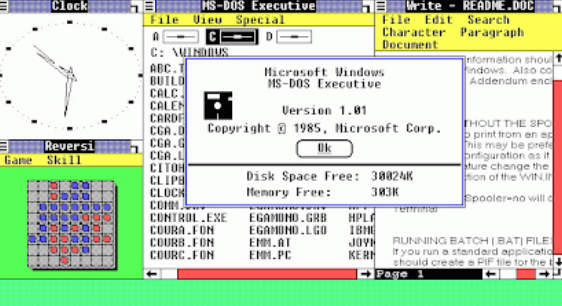

Секрет в том, что никакого *параллельного* исполнения на самом деле нет. Приложения, которые в данный момент выполняются, разделены на потоки, а операционная система берёт на себя обязанности по их **переключению**, то есть потоки всех программ исполняются последовательно, в определённые моменты уступая место на CPU другим потокам. Всё **это происходит крайне быстро**, в результате за 1 секунду тысячи потоков успевают исполнить часть своих инструкций на CPU последовательно, а из-за такой быстроты создаётся *иллюзия* параллельного выполнения программ.

Данный способ организации потоков сохранился и по сей день, а программа, которая занимается **переключением** потоков называется **планировщиком задач** (**job scheduler**). Планировщик, как правило, входит в состав ядра операционной системы.

Ещё раз, только на примере. Допустим, что у нас открыт Telegram, видео на YouTube и PyCharm. Для простоты представим, что у нас одноядерный процессор, а процессы запущенных программ имеют по 1 потоку. Со стороны нам кажется, что они работают одновременно. Как же это выглядит со стороны операционной системы?

Сначала на ядро процессора поступает поток телеграма, процессор выполнит инструкции: проверит есть ли новые сообщения, если они есть, то он нарисует текст на экране и пришлёт уведомление. Затем произойдёт переключение потоков и на ядро попадёт поток браузера, где произойдёт отрисовка нового кадра видео на YouTube. После этого снова произойдёт переключение потока, на этот раз процессор будет проверять ваш код в PyCharm на PEP8. Казалось бы, мы перечислили очень много действий, однако всё это суммарно займёт у процессора всего несколько десятков микросекунд. А каждый из потоков и того меньше. Это происходит настолько быстро, что мы просто не способны заметить то, что всё происходит последовательно.

### Htop

Здесь и далее мы будем часто ссылаться на программу **htop**. Она доступна для Linux и MacOS и выполняет примерно те же функции, что и диспетчер задач в Windows. Она позволяет отслеживать все процессы и потоки в системе и управлять ими.

Давайте рассмотрим её поближе.

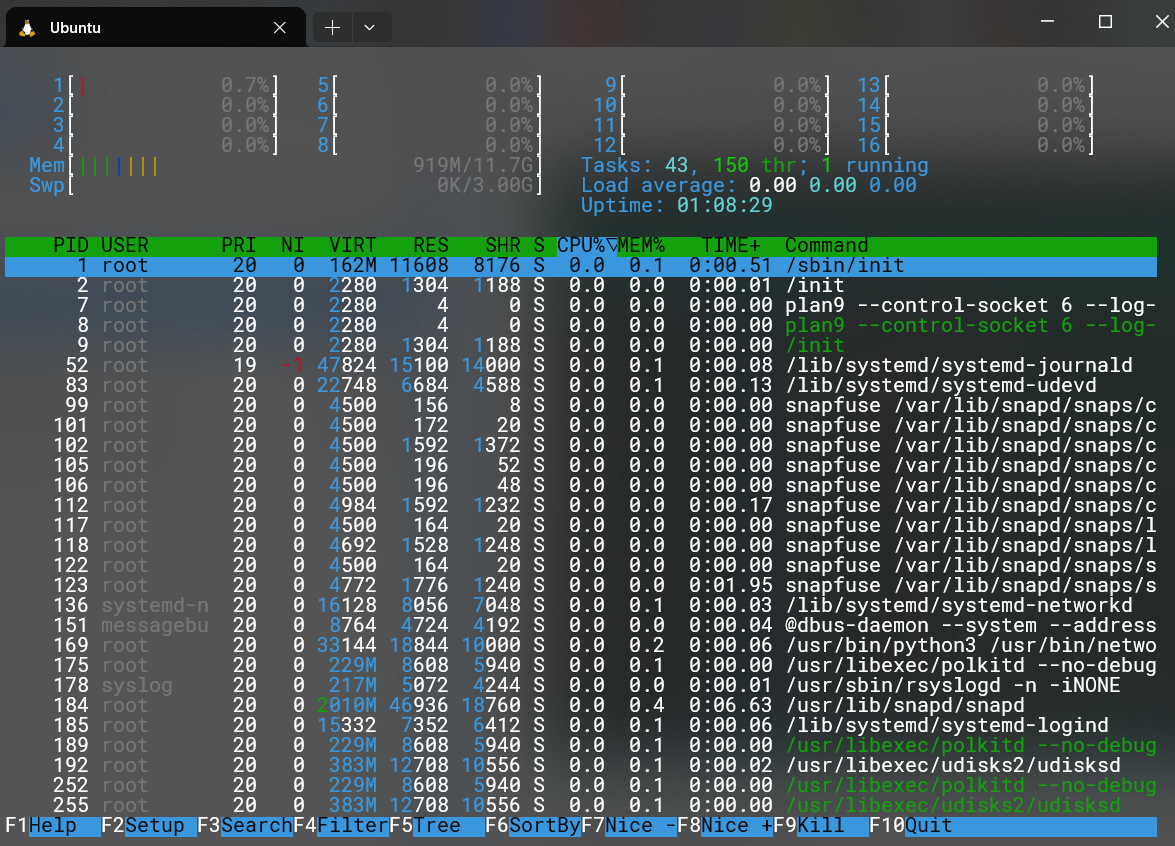

Сверху у нас отображены полосы, которые показывают загруженность всех ядер процессора (у меня их 16, но на самом деле это не совсем ядра, об этом дальше).

Под полосами загрузки ядер указана полоса загруженности оперативной памяти.

Далее идёт большая таблица с информацией о запущенных процессах и их потоках:

- *command* показывает команду, при помощи которой процесс был запущен. Особое внимание тут нужно обратить на цвет надписи. Белый цвет означает, что перед нами *процесс*, а зелёный - *поток*. Также обратите внимание, что почти все процессы имеют несколько потоков, которые идут в списке сразу за ними и имеют такую же команду.
- *CPU%* и *MEM%* показывают, как сильно процесс нагружает процессор и сколько он занимает оперативной памяти от максимального количества. При этом *CPU%* может быть больше 100%, это значит, что процесс загрузил более, чем одно ядро.
- *VIRT* показывает сколько виртуальной памяти доступно процессу (о том, что такое виртуальная память, мы говорили в начале лекции).
- *RES* показывает сколько памяти фактически занято полезными данными. Значение этой колонки всегда меньше значения в колонке *VIRT*. Виртуальной памяти всегда выделяется немного больше, чем нужно, так как всегда нужно иметь небольшой запас, чтобы положить туда новые данные.
- *PID* показывает уникальный номер процесса.
- *S* показывает статус потока. Самые основные это: "R" - поток в данный момент исполняется на процессоре и "S" - поток в данный момент "спит" и его выполнения не происходит.

### Simultaneous multithreading (Hyper-threading)

Мы часто видим (например, если откроем **htop**), что ядер в нашей системе в 2 раза больше, чем фактически. В моём компьютере 8 ядер, но в htop мы видим 16 полосы. В чём же дело? Я немного обманул вас, когда говорил, что на одном ядре может исполняться только один поток. На самом деле на одном ядре могут параллельно исполняться 2 потока (в редких случаях 4 или 8). То есть одно ядро в таком случае можно представить как 2 ядра, на которых исполняется по одному потоку. Такие "условные" ядра принято называть **логическими**, они представляют из себя как бы мини-ядра CPU, которые позволяют параллельно исполнять инструкции на них.

Ещё разок, физически в моём компьютере есть только 8 ядер CPU. Но каждое из них может исполнять параллельно 2 потока (о том как, мы поговорим дальше). Таким образом, максимальное количество одновременно исполняемых потоков для всего процессора целиком становится равным 16 (по 2 на каждое из 8 ядер). Поэтому при выборе процессора в магазине вы постоянно будете видеть фразы: "4 ядра 8 потоков", "2 ядра 4 потока" и т.д. Эти ядра поэтому и называются логическими, посколько не имеют физической формы, это просто возможность исполнить на одном физическом ядре два потока. Эти **логические ядра** также часто называют просто **потоками**, как в примере с описанием процессоров в магазине, и это ни в коем случае не стоит путать с потоками, о которых мы говорили до этого. Есть **поток == набор инструкций**, а есть **поток == логическое ядро**

Попробуем разобраться, как же это работает?

Можно представить, что процессор состоит из различных модулей, выполняющих разные задачи. Среди них можно довольно грубо следующие:

+ Модуль чтения/записи данных
+ Модуль сложения целых чисел
+ Модуль сложения чисел с плавающей точкой
+ Модуль вычисления логических операций и др.

Эта схема имеет крайне мало отношения к действительности и служит лишь для упрощения понимания.

Возможности выполнения инструкций этими модулями называют **ресурсами** процессора. Т.е. если мы складываем много чисел с плавающей точкой, то мы говорим, что используется ресурс сложения чисел с плавающей точкой и т.д.

Понятно, что один поток может не задействовать все **ресурсы** процессора. Процессор не может одновременно записывать данные, складывать числа и вычислять логические выражения. Из этого следует, что во время исполнения потока у нас некоторое количество ресурсов (модулей) остаётся без работы. И здесь приходит на ум совершенно логичная идея - позволить другому потоку занимать свободные ресурсы. Таким образом, это позволяет нам максимально использовать доступные ресурсы ядра, которые будут разделены между двумя потоками.

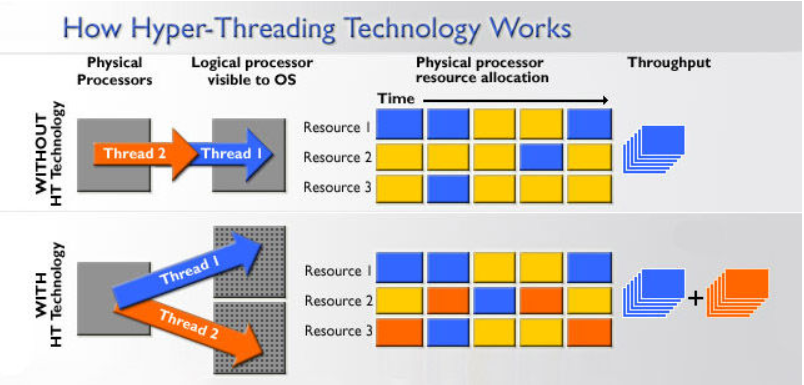

Можно привести пример из жизни. Представьте, что ресурсы процессора это набор цветных карандашей. Каждый карандаш имеет свой цвет и они не повторяются.

Представим, что один человек решил нарисовать рисунок карандашом. В каждый момент времени он будет использовать только один карандаш, т.е. один ресурс. Другие же карандаши будут свободны. Ими может воспользоваться уже другой человек, который будет рисовать свой рисунок параллельно с первым. Как вы уже поняли, эти два человека - потоки.

Рассмотрим более сложную ситуацию. Допустим, что первый человек занят длительной монотонной работой - он рисует море синим карандашом. А второй человек тоже хочет нарисовать синее небо, однако синий карандаш занят. Выходит так, что у второго человека не получится выполнить свою задачу и ему придётся ждать пока первый перестанет использовать карандаш. Получается, что два потока, использующие одни и те же ресурсы, не получают никакой выгоды от многопоточности. Два потока, выполняющих сложение чисел с плавающей точкой, не смогут нагрузить 2 логических ядра.

Из-за подобных ситуаций, разделение физического ядра на два логических практически никогда не даёт прирост в производительности ровно в 2 раза. В среднем, увеличение эффективности вычислений при использовании данной технологии составляет около 20-30%.

Впервые эту технологию придумали ещё в 50-х годах XX века инженеры из компании IBM. Примерно тогда прижилось общее название технологии **Simultaneous multithreading** (на русском - одновременная многопоточность). Введению этой технологии в широкую практику и в потребительские процессоры в частности поспособствовала компания Intel в конце 90-х. Их технология называлась **Hyper-threading** (гиперпоточность), у других производителей процессоров есть свои немного отличающиеся в деталях реализации и названия технологий. В качестве названия можно употреблять одно из перечисленных двух, вас поймут

## Типы задач

> Это одна из самых главных вещей, которую нужно понять в этой теме

Все задачи, выполняемые компьютером, можно разделить на две большие категории:
+ Задачи, сильно нагружающие процессор, занимающие большое количество его ресурсов. Такие задачи называются **CPU bound** (дословно - "связанные с CPU"). Эти задачи используют процессор на полную, а значит **скорость выполнения таких задач тем выше, чем выше "мощность" процессора**
+ Задачи, занимающиеся операциями ввода/вывода. Они называются **IO bound** (дословно - "связанные с вводом-выводом"). При выполнении таких задач процессор часто простаивает и ничего не делает, так как ожидает завершения операций ввода-вывода. Два наиболее ярких примера это **запросы в интернет** и **чтение с диска**. Данные из интернета в среднем поступают со скоростью 1-100 МБ/с, а с диска 10МБ-5ГБ/с. Для процессора эти скорости ОЧЕНЬ медленные. При поступлении новых данных он их очень быстро обрабатывает и начинает ждать следующей порции данных. То есть в промежутках между поступлениями порций данных процессор не делает ничего. Скорость выполнения таких задач ограничена скоростью поступления данных, это или скорость чтения/записи диска или скорость вашего интернета, процессор ничего не может с этим поделать.


## CPU bound задачи

Это задачи в которых узким местом по времени выполнения выступает производительность CPU. Как правило, их можно ускорить аппаратно за счёт повышения частоты процессора. Самый яркий пример &mdash; математические операции

В ячейке ниже приведён пример типичной CPU bound задачи - большое количество вычислений между целыми числами.

In [3]:
def do_work():
    for _ in range(10000000):
        random.randint(1, 40) ** random.randint(1, 20)

In [4]:
%%time

do_work()

CPU times: user 6.15 s, sys: 0 ns, total: 6.15 s
Wall time: 6.15 s


Мы видим, что общее время работы (Wall time) в данном случае равно времени работы процессора (CPU times). Это значит, что процессор был загружен всё время и не отдыхал ни в один момент времени.

## IO bound tasks

Это задачи в которых узким местом по времени выполнения выступают операции ввода-вывода. Это происходит из-за того, что чтение и запись данных происходит намного медленнее, чем их обработка, поэтому процессор длительное время простаивает, ожидая новой порции данных. Например, функция ниже делает указанное число запросов на главную страницу Google.

In [5]:
def do_n_requests(n):
    for _ in range(n):
        requests.get("https://google.com/")

In [6]:
%%time

do_n_requests(15)

CPU times: user 616 ms, sys: 5.33 ms, total: 621 ms
Wall time: 17.1 s


Мы видим, что 15 запросов суммарно заняли 9.95 секунд, в то время как процессор работал всего 446 мс. То есть около 5% всего времени, затраченного на запросы. Остальные 95% времени процессор ничего не делал.

То же самое верно и для одиночного запроса.

In [7]:
%%time

requests.get("https://google.com/")

CPU times: user 37.6 ms, sys: 6.16 ms, total: 43.8 ms
Wall time: 1.29 s


<Response [200]>

# Управление потоками, Модуль `threading`

Для начала мы поговорим о реализации многопоточности. Мы уже говорили о том, что на одном ядре может параллельно исполняться 1-2 потока. К тому же в операционной системе существует планировщик задач, способный очень быстро переключать исполняющиеся потоки, создавая иллюзию параллельного выполнения сотен и тысяч потоков. В итоге мы приходим к логичному решению - ускорить наш код, разбив его инструкции на несколько потоков.

Модуль `threading` предоставляет API для управления потоками в Python.

In [8]:
import threading

Основной класс - **Thread**. Он принимает на вход функцию *target* (по своей сути это и есть набор инструкций для потока, но пока не проинтерпретированных) и аргументы *args* к этой функции. Соответственно каждый поток будет исполнять данную функцию с переданными аргументами. 

Полученный объект класса **Thread** имеет 2 основных метода: **start** и **join**. `start` запускает исполнение потока, а `join` указывает интерпретатору, что надо подождать пока поток не закончит исполнение.

## Использование threading для ускорения IO bound задач

In [9]:
def parallel_requests(num_requests, n_threads):
    threads = [threading.Thread(target=n_requests, args=(num_requests // n_threads,)) for _ in range(n_threads)]
    for thread in threads:
        thread.start()
    for thread in threads:
        thread.join()        

Функция выше принимает на вход количество запросов, которые нужно сделать, а также число потоков на которые требуется распараллелить запросы. Каждый поток, представляет из себя объект класса `Thread`. В функции мы создаём `n_threads` таких потоков в списке, и каждому потоку даём по `num_requests // n_threads` запросов, т.е. делим их поровну между потоками. Функция `n_requests`, описанная нами ещё выше будет представлять из себя непосредственно инструкции для потока (определённое количество запросов в интернет)

In [10]:
%%time

n_requests(15)    # 15 запросов в одном потоке

NameError: name 'n_requests' is not defined

In [11]:
%%time

parallel_requests(15, 15)    # 15 запросов в 15 потоках (по одному запросу на поток)

NameError: name 'n_requests' is not defined

В результате имеем прирост к скорости выполнения приблизительно в 10 раз, относительно того же количества запросов в одном потоке. В вызове выше произошло разделение 15 запросов на 15 потоков (то есть по одному запросу на поток).

Также заметим, что теперь время работы CPU составляет около **25%** от общего время работы, что очень хорошо. Это значит, что мы смогли более эффективно использовать процессорное время и он меньше простаивал.

### Метод `join`

Но всё ещё может быть не совсем понятно, зачем нужен метод `join`. Посмотрим на примере:

In [12]:
def random_sleep():
    sleep_time = random.randint(1, 10)
    time.sleep(sleep_time)
    print(sleep_time)

Функция `time.sleep` тоже является IO bound задачей, так как мы принудительно заставляем процессор ничего не делать. Это очень похоже на состояние, когда мы читаем с диска или из интернета, только в случае `time.sleep` потребляется совсем ничтожное количество ресурсов процессора. В примере ниже процессор был загружен 0.03% от всего времени.

In [13]:
%%time
time.sleep(10)

CPU times: user 1.72 ms, sys: 0 ns, total: 1.72 ms
Wall time: 10 s


Вернёмся к `join`. Запустим 10 потоков, каждый из которых будет спать случайное время, а затем сразу запустим следующую ячейку, не дожидаясь исполнения предыдущей.

In [14]:
threads = [threading.Thread(target=random_sleep) for _ in range(10)]
for thread in threads:
    thread.start()
for thread in threads:    
    thread.join()
    
print("Something")

2
4
6
7
7
8
8
8
10
10
Something


In [15]:
print("Something")

Something


Мы видим, что исполнение ячейки `print("Something")` не началось, пока не завершилось исполнение всех потоков в ячейке выше. Этого не происходит из-за `join`.

Теперь попробуем сделать тоже самое, но без использования `join`

In [16]:
threads = [threading.Thread(target=random_sleep) for _ in range(10)]
for thread in threads:
    thread.start()
    
print("Thread has not finished yet!")

Thread has not finished yet!


In [17]:
print("Thread has not finished yet!")

Thread has not finished yet!


В этом случае исполнение следующей ячейки началось сразу же, без ожидания выполнения всех потоков. К тому же печать "Thread has not finished yet!" завершилась раньше любого из них.

Всё это, конечно, здорово, но всё равно не совсем понятно, как и зачем это использовать.

Зачастую мы хотим распараллелить только часть задачи, которую нам нужно сделать. Например, мы параллельно скачиваем данные с 100 различных сайтов, а сразу после этого хотим их как-то обработать. Чтобы исполнение нашего кода не ушло к стадии обработки данных не дождавшись завершения их скачивания (почти как в примере выше) и нужен `join`. Для наглядной иллюстрации запустим скрипт **threading_join_demo.py**. Давайте представим, что `download_data` - это какая-то IO bound задача, например скачивание таблиц с интернета, а `process_data` как-то обрабатывает эти данные. Запустив скрипт, мы увидим, что он всё равно не завершится пока все потоки не "скачают данные", однако их "обработка" произойдёт намного раньше их полного скачивания, что крайне нежелательно. Поэтому мы и используем `join`, мы не хотим, чтобы после запуска потоков выполнение программы убегало вперёд не дождавшись их.

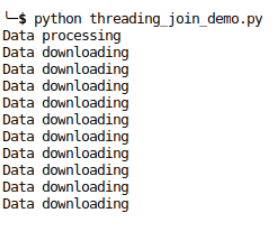

Заодно мы можем посмотреть как запуск этого скрипта выглядит в **htop**.

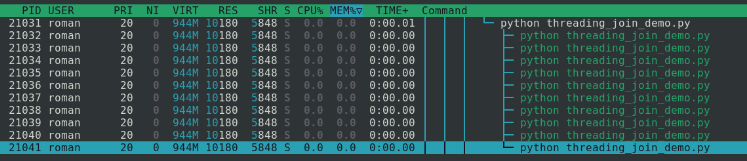

Обратите внимание на колонку *command*. Мы видим один **процесс** нашей программы, он выделен белым цветом и 10 зелёных **потоков**, каждый из которых спит и ничего не делает (колонка *S*), так как они заняты IO bound задачей. 

На самом деле потоков здесь 11. Один из них прячется за белыми буквами, так как изначально каждый процесс имеет один главный поток. В нём как раз и происходит выполнение всего основного кода программы: создание списка потоков, запуск списка потоков, выполнение функции `process_data`

### Преимущества и ограничения потоков

Потоки являются довольно легковесными, они требуют мало памяти и их можно создать довольно много. На картинке видно, что кратное увеличение количества потоков приводит к **практически** кратному уменьшению времени необходимому для совершения запросов. Слово **практически** здесь выделено не случайно, дело в том, что когда потоков становится очень много, затраты процессорного времени на их создание и постоянное переключение тоже становятся очень большими, поэтому эффективность постепенно снижается. Если бы этих затрат не было, то 100 запросов в 100 потоках на картинке снизу (фиолетовая линия) исполнялись бы за 0.6 секунд, а не за 4 как на картинке.

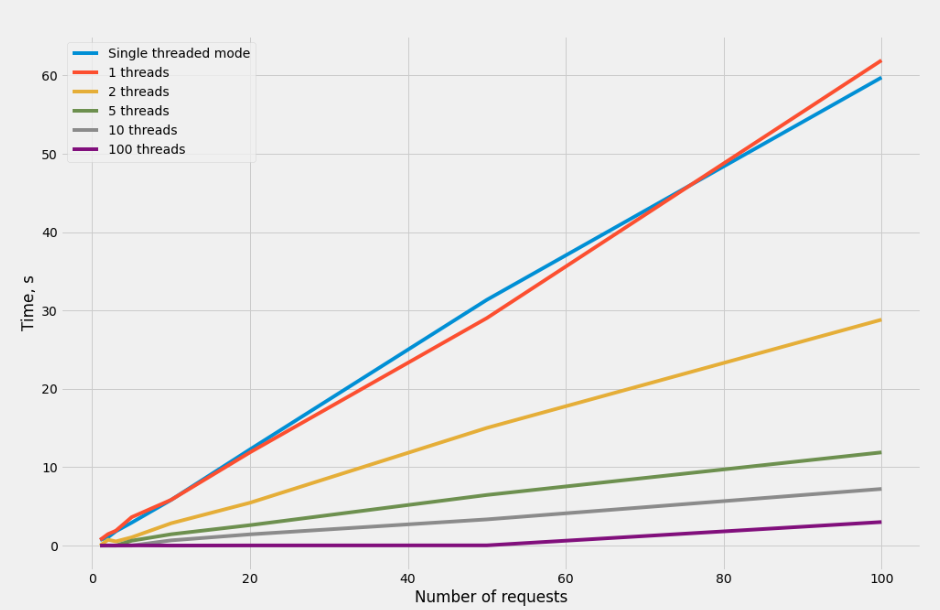

## 3 способа использовать threading

### Самый простой

Наиболее простой и безболезненный способ сделать многопоточность. Плюс в том, что можно совершенно не забивать голову тем, как это работает, но если что-то пойдёт не так, то не понятно что делать.

На этот раз нужный класс лежит в другом модуле. Модуль `concurrent.futures` предоставляет нам удобные функции для высокоуровнего использования параллельного программирования (он тоже входит в стандартную библиоеку питона).

In [18]:
from concurrent.futures import ThreadPoolExecutor

In [19]:
%%time

n_requests = 100
n_threads = 50

with ThreadPoolExecutor(n_threads) as pool:                                 # Создаём пул с заданным числом потоков
    results = pool.map(requests.get, ["https://google.com/"] * n_requests)  # Применяем функцию к контейнеру с аргументами для этой функции 
    print(type(results), list(results)[:5])                                 # Получаем результаты исполнения функций из генератора results

1
2
2
4
4
<class 'generator'> [<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]
CPU times: user 4.05 s, sys: 694 ms, total: 4.74 s
Wall time: 4.26 s


Класс `ThreadPoolExecutor` создаёт специальный объект &mdash; контекстный менеджер. Этот тип объектов умеет работать с конструкциями `with`, как в случае файлов. `open("some_file.txt")` тоже возвращает контекстный менеджер. При создании этого объекта мы должны указать число потоков, которые мы используем. У данного объекта есть метод `map`, он принимает функцию, которая должна исполняться внутри потока, а также список **всех** данных, которые нужно обработать.

При вызове `map` происходит магия. `pool` берёт и создаёт количество потоков, которое мы указали и равномерно распределяет данные по потокам. То есть нам совершенно не нужно беспокоиться о том, как передавать данные в поток. Нам всего-лишь нужна функция, которая что-то делает с данными (`requests.get` в примере) и сами данные для этой функции (100 адресов гугла). Всё распределится "само" и выполнится максимально эффективно. При этом нам ещё вернутся результаты в виде итератора.

### Чуть сложнее

Здесь потребуются знания базового интерфейса модуля `threading`, по скорости - то же самое, что и `ThreadPoolExecutor`. Плюсы в том, что позволяет более гибко настраивать поток, удобнее передавать аргументы, по-желанию можно не делать `join`, который в `ThreadPoolExecutor` делается автоматически. Минус - чуть больше букв (5 строк на самый базовый случай), а также придётся самим заниматься распределением аргументов по потокам

In [20]:
%%time
def make_requests(url_list):
    for url in url_list:
        requests.get(url)

# Выполняем такую-же задачу, как и в предыдущем пункте
        
n_requests = 100
n_threads = 50
threads = [threading.Thread(target=make_requests, args=(["https://google.com/"] * (n_requests // n_threads),)) for _ in range(n_threads)]
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()     

5
6
7
7
CPU times: user 4.59 s, sys: 285 ms, total: 4.87 s
Wall time: 5.32 s


### Сложно

Создание собственного класса-наследника `Thread`. Здесь от нас требуется переопределить метод `run` - это код, который будет исполняться в потоке. По желанию, можно дописать конструктор и любые другие методы. Плюс - супер гибкая настройка потока, минус - ещё больше букв, хотя интерфейс простой и запутаться здесь сложно. По скорости опять таки без изменений.

In [21]:
%%time

class MyThread(threading.Thread):
    def __init__(self, url_pool):
        super().__init__()    # Нужно сначала инициализировать объект конструктором родительского класса
        self.url_pool = url_pool
    
    def run(self):
        for url in self.url_pool:
            requests.get(url)
            
            
n_requests = 100
n_threads = 50
    
threads = [MyThread(["https://google.com/"] * (n_requests // n_threads)) for _ in range(n_threads)]
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()     

10
CPU times: user 4.43 s, sys: 268 ms, total: 4.7 s
Wall time: 5.27 s


С классом мы можем делать что угодно: например, добавлять новые методы и атрибуты, но главное не забыть:

+ Отнаследоваться от класса `Thread`
+ Сделать `super().__init__()` в конструкторе
+ Переопределить метод `run`

Метод `run` не принимает аргументов, поэтому если мы захотим передать данные в поток, то дожны будем сделать это через конструктор, сохранив их в атрибуты. Содержимое метода `run` непосредственно является инструкциями потока. Там мы пишем абсолютно любой код, который мы хотим распараллелить

## Пример применения многопоточности НЕ в запросах к интернету

Пока что мы говорили только про применение многопоточности в IO bound задачах. Но прежде чем перейти к CPU bound, давайте рассмотрим ещё один пример использования многопоточности. Для этого сформулируем задачу:

**Задача:** Раз в секунду программа в бесконечном цикле печатает число 0. При нажатии на любую кнопку программа продолжает печатать, но уже нажатый символ. Между событиями печати не должно проходить более 1 секунды.

Наивное решение, которое первое приходит на ум:

In [22]:
character = "0"
while True:
    print(character)
    time.sleep(1)
    character = input()

0


KeyboardInterrupt: Interrupted by user

`input` блокирует основной поток программы, то есть прерывает её исполнение до поступления данных. Это ещё один пример IO bound задачи, процессор ничего не делает пока ждёт ввода от пользователя. Кажется нам понадобится сторонняя библиотека (см. скрипты **threading_use_case_base.py**, **threading_use_case_full.py**, так как на линуксе библиотеке нужны права администратора, то надо запускать из терминала). Но также приведу код здесь, но не факт, что он будет работать.

In [ ]:
import keyboard

##
## Код ниже вероятно не будет работать у вас в ноутбуке, т.к.
## ему нужен рутовый доступ, то есть надо запускать в терминале через sudo
##

In [ ]:
# Код из скрипта threading_use_case_base.py

character = 0
while True:
    print(character)
    time.sleep(1)
    character = keyboard.read_key()

Такой способ уже имеет одно заметное приемущество &mdash; нам не нужно нажимать на **Enter** чтобы ввести символ, однако выполнение программы по прежнему блокируется. Но не спешите расстраиваться! Ведь когда мы делаем запрос в интернет наша программа тоже блокируется и ничего не делает, только это происходит гораздо быстрее. По сути обе ситуации являются типичными IO bound задачами, а значит мы можем использовать многопоточность.

In [ ]:
# Код из скрипта threading_use_case_full.py


class KeyboardListener(threading.Thread):
    def __init__(self, active_character):
        super().__init__()
        self.active_character = active_character

    def run(self):
        while True:
            self.active_character = keyboard.read_key()
            if self.active_character == "esc":
                return


character = "0"
listener = KeyboardListener(character)
listener.start()
while True:
    print(character)
    time.sleep(1)
    character = listener.active_character

Код выше решает поставленную нами ранее задачу. Давайте разберёмся как он работает.
Вся суть в том, что мы полностью принимаем тот факт, что мы **не можем** передать программе информацию о нажатии кнопки без блокировки её исполнения. Однако, что если функционал детекции нажатых нами кнопок мы переложим на отдельный поток? Таким образом основной поток не будет прерываться и будет каждую секунду печатать число, а поток для детекции будет постоянно заблокированным до нажатия на кнопку.

Теперь конкретно разберём пример. Класс `KeyboardListener` будет создавать поток, который в бесконечном цикле как бы "прослушивает" нажатия кнопок на клавиатуре и сохраняет последнюю нажатую кнопку в атрибут `active_number`. При этом большую часть времени он заблокирован и ждёт нажатия.

Мы создаём объект потока в главном потоке программы и запускаем его. Очень важно отметить, что здесь мы не используем `join`, так как мы не хотим ждать пока этот поток завершится, мы хотим сразу продолжить выполнять программу дальше.

При этом на каждой итерации цикла по печати текущего числа мы "подсматриваем" его у потока, обращаясь к его атрибуту `number = listener.active_number`.

## Доступ к данным при многопоточности

До сих пор мы использовали потоки только для того, чтобы распараллеливать задачи и даже не задумывались от том, что зачастую нам нужно получть данные, которые были получены в потоке. Например, в случае с интернет запросами, мы хотим получать статус запроса, его содержимое и так далее. Но как нам вернуть эти данные их потока? И возможно ли это вообще?

Краткий ответ - ДА. Мы уже видели, что при использовании `ThreadPoolExecutor` мы можем получить в распоряжение генератор с результатами. Однако остаётся вопрос &mdash; как это работает?

Поскольку потоки принадлежат одному процессу, они все имеют общую память, которой обладает процесс (та самая **virtual memory**). Любой поток может производить операции с этой памятью. Например, потоки могут добавлять элементы в список, объявленый в глобальной области видимости, но несколько удобнее обмениваться данными через атрибуты объекта потока (как в примере выше).

Для того, чтобы убедиться в том, что все потоки имеют доступ ко всей памяти процесса, разберём игрушечный пример. Мы запустим 3 потока, каждый из которых будет спать случайное время и записывать число в список из главного потока.

In [23]:
import random

In [24]:
lst = []

def append_to_list(thread_id):
    time.sleep(random.randint(1, 5))
    lst.append(thread_id)

threads = [threading.Thread(target=append_to_list, args=(i,)) for i in range(3)]
for thread in threads:
    thread.start()
for thread in threads:
    thread.join() 

In [25]:
lst

[2, 0, 1]

Получилось! В списке есть 3 числа, значит все потоки смогли добавить туда по одному элементу. Получается, что потоки могут обмениваться данными друг с другом.

### А что если попробовать получить доступ к данным одновременно?

Попытаемся изменить первый элемент списка *lst* сразу 10 потоками. Как вы думаете, что же произойдёт?

In [26]:
lst = [0, 0, 0]

def append_to_list(thread_id):
    time.sleep(1)
    lst[0] = thread_id

threads = [threading.Thread(target=append_to_list, args=(i,)) for i in range(10)]
for thread in threads:
    thread.start()
    
for thread in threads:
    thread.join() 

In [27]:
lst

[9, 0, 0]

### Ничего. Но как тогда потоки решили, кто именно из них в итоге запишет число?

Ладно. Я долго скрывал это от вас, но пришло время раскрыть все карты...

**Потоки в питоне НЕ выполняются параллельно!**

Но как же так? Мы же видели, что увеличение количества потоков позволяет в десятки и сотни раз повысить скорость выполнения серии запросов в интернет. А также детектировать нажатия на клавиатуру пока работает основной поток. Давайте разбираться, как это работает

## Во всём "виноват" GIL

Начнём издалека. Дело в том, что операции одновременного доступа к данным, которые мы пытались совершить в предыдущем примере крайне небезопасны и могут привести к неопределённым последствиям и повреждению данных. Вследствие этого в питоне предусмотрено специальное средство, обеспечивающее безопасность обращения потоков к общим данным - **Global Interpreter Lock** (**GIL**). Разные языки по разному борются с этой проблемой, однако зачастую позволяют исполнять потоки одного процесса по-настоящему **параллельно**.

В питоне решили поступить более радикально, **запретив** исполнять более одного потока **одновременно** на уровне интерпретатора для обеспечения потокобезопасности. **Таким образом *многопоточность* в питоне выглядит практически полностью аналогично *многозадачности* на одноядерных CPU**.

То есть, если мы имеем 100 потоков, то интерпретатор будет переодически переключать их между собой, создавая *иллюзию* параллельного выполнения.

В случае добавления элементов в список несколькими потоками интерпретатор **гарантирует**, что это произойдёт последовательно, поскольку в каждый момент времени работает только один поток. Когда поток приступает к работе и выполняет CPU bound задачу GIL переходит в закрытое состояние (**acquire**). В данном состоянии GILa ни один поток кроме данного не может выполняться и переключения потоков тоже не может произойти. Интерпретатор питона не может переключать потоки во время выполнения CPU bound задачи, так как это может нарушить нормальный ход её выполнения. Когда в потоке начинается I/O часть, GIL открывается (**release**) и интерпретатор может выбрать новый поток для выполнения, пока первый занят I/O задачей, интерпретатор же сразу закрывает GIL и так пока всё не закончится.

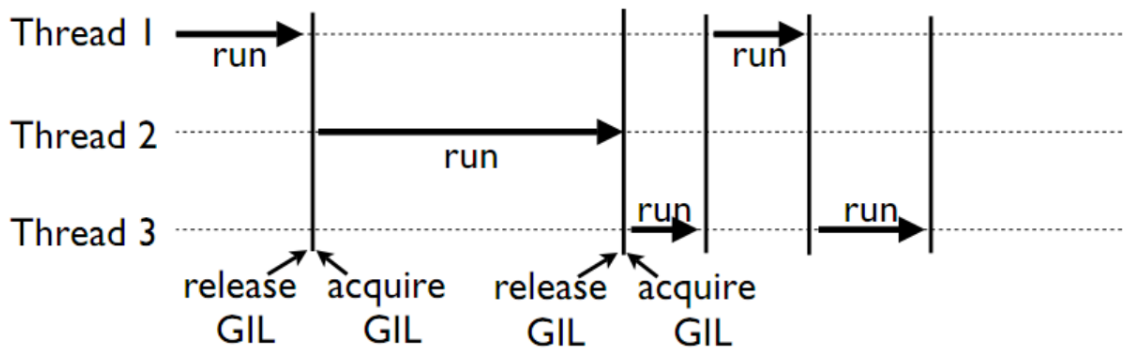

Это очень сложный механизм и, если пока ничего не понятно, то это совсем не страшно. Главное, что нужно запомнить &mdash; **потоки в питоне исполняются последовательно, а не параллельно, аналогично *многозадачности* на одноядерных CPU**

Из вышеперечисленного следует, что потоки не могут решать CPU bound задачи, так как **они работают только последовательно**. Докажем это на примере.

In [ ]:
# Код из скрипта GIL_demo.py


def do_work():
    for _ in range(100000000):
        random.randint(1, 40) ** random.randint(1, 20)


threads = [threading.Thread(target=do_work) for i in range(2)]    # Всего мы имеем 3 потока, 2 созданных + 1 главный
for thread in threads:
    thread.start()

do_work()

В любой момент времени, активен только один поток, в то время как оставшиеся два - спят. Эти картинки наглядно демонстрируют эффект от работы GIL.

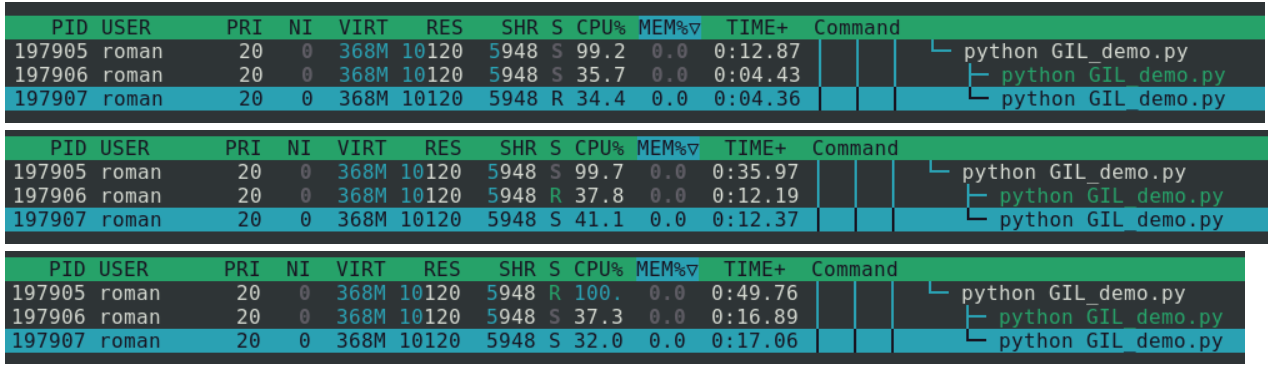

Но почему же тогда IO bound задачи ускорялись, если потоки исполняются последовательно? 

По сути там происходит параллельное **ожидание**. Если в момент, когда у нас началось ожидание (например, интернет запрос на 2 секунды), потоки переключатся, то мы сразу же получаем приемущество, поскольку в новом потоке мы делаем что-то полезное, а в потоке, который мы оставили по прежнему идут эти 2 секунды, которые нам нужно было подождать.

То есть в случае многопоточности в питоне, мы распараллеливаем не полезные вычисления, а ожидание.

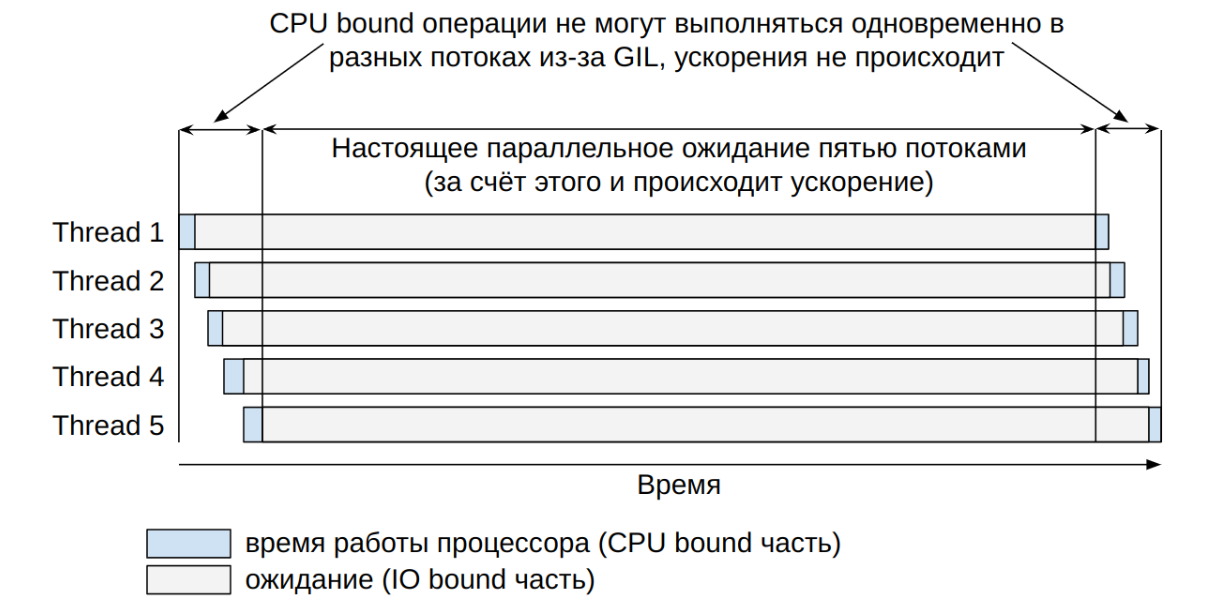

## Итоги по threading

**Когда стоит использовать:**
+ Параллельные интернет запросы
+ Неблокирующий ввод-вывод (задача с нажатием кнопок)
+ Запараллеливание любого достаточно медленного I/O

**Плюсы:**
+ Легковесные (но лучше не запускать больше 1000, расходы на их переключение в один момент начинают быть слишком большими)
+ Можно использовать общую память

**Минусы:**
+ Нет настоящей параллельности из-за GIL (в интернете все пишут, что это очень не круто, но он реально избавляет от кучи головной боли с синхронизацией потоков)
+ Совсем не могут в CPU bound задачи из-за первого минуса

# Управление процессами, Модуль `Multiprocessing`

Название говорит само за себя, вместо использования множества потоков, здесь используется множество процессов. В Python многопроцессорность реализуется модулем `multiprocessing` стандартной библиотеки. Его основной интерфейс полностью повторяет интерфейс `threading`, поэтому про него здесь говорить не будем. Так же как и в `threading` здесь есть базовый класс `Process` с методами `start` и `join`, всё по аналогии.

Ниже приведены 3 способа использовать `multiprocessing` по аналогии с `threading`, убедитесь, что они очень похожи.

## 3 способа использовать multiprocessing

### Самый простой

In [29]:
from concurrent.futures import ProcessPoolExecutor

Абсолютно идmентичен ему `multiprocessing.Pool`

In [30]:
%%time

n_requests = 10
n_proc = 10

with ProcessPoolExecutor(n_proc) as pool:                               
    results = pool.map(requests.get, ["https://google.com/"] * n_requests)
    print(type(results), list(results)[:5])                                 

<class 'generator'> [<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]
CPU times: user 2.5 s, sys: 68.5 ms, total: 2.57 s
Wall time: 2.57 s


### Чуть сложнее

In [31]:
import multiprocessing

In [32]:
%%time

def make_requests(url_list):
    for url in url_list:
        requests.get(url)

        
n_requests = 10
n_proc = 10
processes = [multiprocessing.Process(target=make_requests, args=(["https://google.com/"] * (n_requests // n_proc),)) for _ in range(n_proc)]
for proc in processes:
    proc.start()
for proc in processes:
    proc.join()     

CPU times: user 2.26 s, sys: 89.4 ms, total: 2.35 s
Wall time: 2.35 s


### Сложно

In [33]:
import multiprocessing

In [34]:
%%time

class MyProcess(multiprocessing.Process):
    def __init__(self, url_pool):
        super().__init__()
        self.url_pool = url_pool
    
    def run(self):
        for url in self.url_pool:
            requests.get(url)
            
            
n_requests = 10
n_proc = 10
    
processes = [MyProcess(["https://google.com/"] * (n_requests // n_proc)) for _ in range(n_proc)]
for proc in processes:
    proc.start()
for proc in processes:
    proc.join()     

CPU times: user 1.86 s, sys: 40.8 ms, total: 1.9 s
Wall time: 1.9 s


In [35]:
%%time

for _ in range(10):
    requests.get("https://google.com/")

CPU times: user 12.4 s, sys: 112 ms, total: 12.5 s
Wall time: 12.3 s


Как вы видите, всё идентично, кроме названий классов. К тому же мы заодно убедились в том, что процессы успешно справляются с ускорением IO bound задач (запросов в интернет)

Как мы уже видели, потоки не справляются с CPU bound задачами.

In [60]:
def do_work():
    for _ in range(1000000):
        random.randint(1, 40) ** random.randint(1, 20)

In [61]:
%%time
do_work()      # Один поток

CPU times: user 1.35 s, sys: 40.3 ms, total: 1.39 s
Wall time: 1.4 s


In [62]:
%%time
n_threads = 2

threads = [threading.Thread(target=do_work) for _ in range(n_threads)]      # Два потока
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()     

CPU times: user 3.38 s, sys: 20.5 ms, total: 3.4 s
Wall time: 3.43 s


Попробуем сделать тоже самое на процессах. Создадим 2 процесса, которые выпоняют CPU bound вычисления в `do_work` и заодно посмотрим сколько времени занимает один вызов этой функции

In [87]:
%%time

do_work()

CPU times: user 641 ms, sys: 5.58 ms, total: 647 ms
Wall time: 646 ms


In [70]:
%%time
n_proc = 2
procs = [multiprocessing.Process(target=do_work) for _ in range(n_proc)]
for proc in procs:
    proc.start()
for proc in procs:
    proc.join()     

CPU times: user 0 ns, sys: 10.9 ms, total: 10.9 ms
Wall time: 702 ms


Два процесса выполнились **параллельно** за то же самое время, что и один. Почему же так произошло? В чём различия с `threading`?

Мы знаем, что процесс это набор инструкций, хранящихся в памяти и процесс их исполнения. Изначально программа на питоне представлена всего одним процессом, он создаётся в момент запуска интерпретатора. То есть для создания процесса нужно просто запустить новую копию интерпретатора. Это помогает нам избавиться от проблемы GIL. Нет, он никуда не исчезнет, наоборот, теперь в каждом из созданных процессов будет свой GIL, блокирующий параллельное исполнение потоков (кстати, в созданных процессах можно также создавать потоки и процессы). Однако поскольку сами процессы представляют из себя отдельный запуск интерпретатора, они являются полностью изолированными друг от друга. Они НЕ имеют общей памяти, а GIL процесса может воздействовать только на внутренние потоки, но никак не на другие процессы.

Суммируя всё сказанное выше, ничто не мешает отдельным питоновским процессам исполняться параллельно на разных ядрах CPU, поскольку GIL имеет власть только внутри одного процесса.

Полностью аналогичного эффекта можно достичь запустив ваш скрипт несколько раз на разных наборах данных прямо из терминала, но это не удобно.

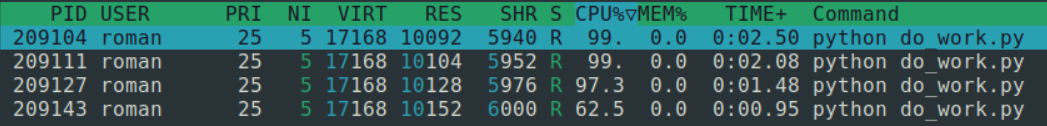

**Ещё одно важное замечание**. Питон всего лишь создаёт новые процессы, но ОС уже решает на каких ядрах CPU эти процессы будут выполняться, питон уже не может это контролировать

### 2 процесса мало, хочу ещё больше

In [77]:
%%time
n_proc = 4

procs = [multiprocessing.Process(target=do_work) for _ in range(n_proc)]
for proc in procs:
    proc.start()
for proc in procs:
    proc.join()     

CPU times: user 0 ns, sys: 18.4 ms, total: 18.4 ms
Wall time: 932 ms


И мы успешно выполнили параллельно 4 функции `do_work` за тоже самое время

### 6 процессов

In [79]:
%%time
n_proc = 6

procs = [multiprocessing.Process(target=do_work) for _ in range(n_proc)]
for proc in procs:
    proc.start()
for proc in procs:
    proc.join()     

CPU times: user 7.77 ms, sys: 20.3 ms, total: 28 ms
Wall time: 1.06 s


### 17 процессов

In [84]:
%%time
n_proc = 17

procs = [multiprocessing.Process(target=do_work) for _ in range(n_proc)]
for proc in procs:
    proc.start()
for proc in procs:
    proc.join()     

CPU times: user 27 ms, sys: 60.3 ms, total: 87.2 ms
Wall time: 1.93 s


### И время почему-то увеличилось более чем в 2 раза...

Почему так произошло? Всё дело в количестве ядер, поскольку я имею 8 ядер, это позволяет мне исполнять только 8 потоков по настоящему **параллельно**. В случае с CPU bound задачами не прокатывает фишка с быстрым переключением потоков, так как процессор не простаивает ни секунды, а значит выгоды получить не удастся.

Но а как же Simultaneous Multithreading, он же даёт нам ещё одно логическое ядро, которое помогает ускорить выполнение?

Ответ прост: поскольку мы выполняем однотипные задачи, то свободные ресурсы процессора нам не особо актуальны. Мы хотим умножать, но умножающий модуль занят, придётся ждать. А вот в распараллеливании разноплановых задач Simultaneous Multithreading проявляет себя получше. 

Эту интересную особенность (резкий скачок времени выполнения при превышении количеством процессов количества ядер) можно использовать весьма необычно. Давайте определим количество ядер в компьютере по графику зависимости времени выполнения от количества ядер.

Попробуйте разобраться в коде для построения графика самостоятельно

In [92]:
from tqdm.notebook import tqdm

In [94]:
import matplotlib.pyplot as plt

In [113]:
def do_work():
    for _ in range(800000):
        random.randint(1, 40) ** random.randint(1, 20)

In [114]:
def do_work_in_parallel(n_workers):
    start = time.time()
    procs = [multiprocessing.Process(target=do_work) for _ in range(n_workers)]
    for proc in procs:
        proc.start()
    for proc in procs:
        proc.join()
    return time.time() - start


core_times = []
for n_cores in tqdm(range(1, 33)):
    time_to_work = do_work_in_parallel(n_cores)
    core_times.append(time_to_work)

  0%|          | 0/32 [00:00<?, ?it/s]

Text(0, 0.5, 'Время выполнения, с')

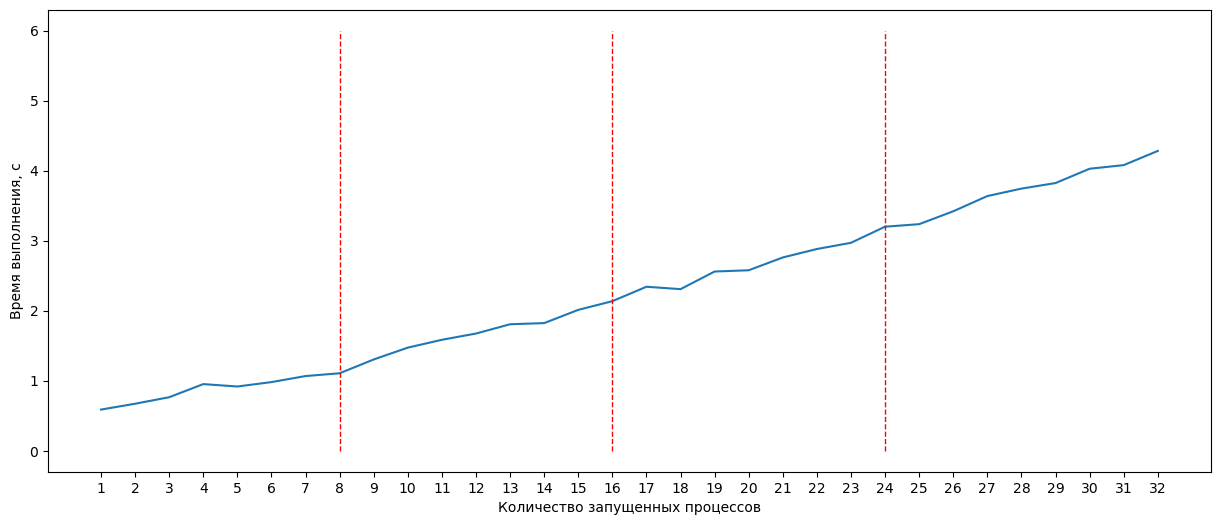

In [116]:
plt.rc("figure", figsize=(15, 6))
plt.rc("font", size=10)

plt.plot(range(1, 33), core_times)
plt.xticks(range(1, 33), range(1, 33))
plt.vlines([8, 16, 24], 0, 6, color="red", lw=1, linestyle="dashed")
plt.xlabel("Количество запущенных процессов")
plt.ylabel("Время выполнения, с")

На первый взгляд, мы видим самый обычный график. Однако, обратите внимание на его самое начало. Время выполнения очень слабо увеличивается в ответ на увеличение числа процессов. Это значит, что мы ещё не превысили количество ядер CPU. Небольшое увеличение времени связано с тем, что на создание процессов тоже требуется время и, чем их больше, тем больше его нужно.

Обратим внимание на точку, где происходит резкий скачок по времени. Это точка 9. Увеличение времени связано с тем, что при запуске 9-го процесса все ядра уже заняты, поэтому он не попадает на ядро и ему приходится ждать пока хотя бы одно не освободится. То есть, грубо говоря, у нас выполнились 8 процессов параллельно и один последовательно после них. Это значит, что предыдущая точка до скачка (8) означает количество ядер у нас. Можете проверить это у себя на компьютере, если не уверены, сколько у вас ядер.

Но и это ещё не всё. Далее мы видим ещё один скачок на уровне 17 процессов, который делит оставшийся график на 2 части. Время на интервале с 9 по 17 процесса увеличивается, но не так быстро как на интервале 17-24. Это связано с тем, что когда мы заполнили все ядра, начинают работать логические ядра (благодаря Simultaneous Multithreading). Хоть они и не очень эффективны в однотипных задачах, но всё же немного ускоряют работу. Как раз поэтому время на интервале 9-17 увеличивается медленнее. После загрузки всех логических ядер происходит ещё один скачок, после которого время начинает увеличиваться более резко.

## Доступ к данным

У потоков было всё очень хорошо и прозрачно в отношении доступа к данным. А что с процессами? Тут всё очень просто, его нет)))

Попробуем провернуть тот же фокус с добавлением элементов в список как в случае с `threading`. Создадим три процесса, которые будут добавлять числа в список, находящийся в глобальном окружении.

In [ ]:
lst = []

def append_to_list(pid):
    time.sleep(random.randint(1, 5))
    lst.append(pid)
    print(lst)

procs = [multiprocessing.Process(target=append_to_list, args=(i,)) for i in range(3)]
for proc in procs:
    proc.start()
for proc in procs:
    proc.join()

In [ ]:
lst

Список пустой, но и ошибки никакой не произошло. Куда же добавляли элементы процессы? Выведем содержимое `lst` внутри процессов, предварительно заполнив его.

In [ ]:
lst = ["P", "r", "o", "c", "e", "s", "s"]

def append_to_list(pid):
    time.sleep(random.randint(1, 5))
    lst.append(pid)
    print(f"Process: {pid}, lst = {lst}")

procs = [multiprocessing.Process(target=append_to_list, args=(i,)) for i in range(3)]
for proc in procs:
    proc.start()
for proc in procs:
    proc.join()

In [ ]:
lst

Очень страннно... Оказывается, что каждый процесс сохраняет себе собственную копию `lst` и добавляет в него число. `lst` же в главном процессе остаётся без изменений. Такое поведение происходит из самого механизма создания процессов в операционной системе.

Создание процесса происходит с помощью системного вызова **fork()**. Системный вызов это специальная функция, которую использует операционная система для своей работы. При этом происходит создание **полной копии процесса**, в котором fork был вызван. Начальный процесс теперь является **родителем**, а новый процесс **потомком**. Изначально они являются полностью одинаковыми, но потомки вскоре начинают изменяться в зависимости от нужд. При завершении родительского процесса автоматически завершаются все его потомки.

Когда мы пользуемся модулем `multiprocessing` мы своими глазами не видим вызова **fork**, но он происходит внутри, в тот момент, когда мы вызываем метод `start`.

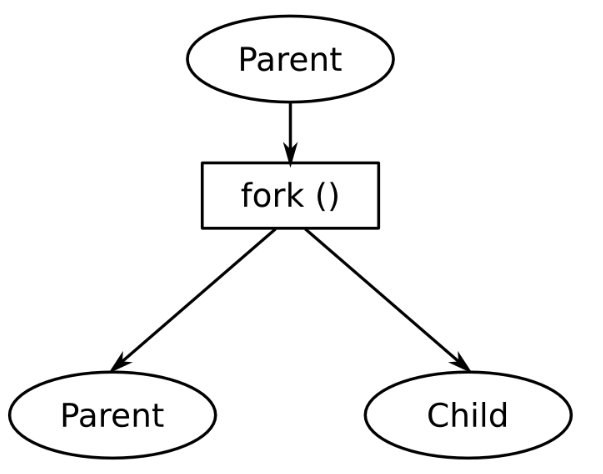

В нашем случае при создании процесса он стал полной копией процесса-родителя, а значит сохранил ВСЕ переменные объявленные в нём, в том числе и `lst`. После этого события память процессов становится изолированной друг от друга, а значит и обмен данными невозможен (почти).

### Получение данных из процесса

Скорее всего, вы будете создавать различные процессы, чтобы распараллелить расчёты. Но там где есть расчёты, есть и результаты, которые мы хотим получить. В таком случае появляется вопрос, как получить данные из процесса? Мы ведь уже выяснили, что они имеют полностью изолированную память, а значит придётся как-то ухищряться

Для обмена данными между процессами нам нужно **что-то**, что способно обеспечить безопасный доступ к данным, вариантов тут может быть несколько

#### Файлы

Суть подхода такова:
1. Процессы сохраняют результаты расчётов на диск
2. После завершения всех процессов, мы загружаем все файлы и собираем все результаты в главном процессе
3. Обрабатываем результаты

Рассмотрим на примере, допустим, что наши процессы делают какие-то сложные операции с датафреймами

In [117]:
import numpy as np
import pandas as pd

/tmp/ipykernel_4532/1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [118]:
dataframes = [pd.DataFrame(np.random.uniform(size=(10, 10))) for _ in range(10)]

def do_math(df, process_id):
    # Очень сложная и вычислительно объёмная математика
    result = df
    result.to_csv(f"result_{process_id}.csv")

processes = [multiprocessing.Process(target=do_math, args=(df, pid))
             for pid, df in enumerate(dataframes)]
for proc in processes:
    proc.start()
for proc in processes:
    proc.join()
    

results = [pd.read_csv(f"result_{process_id}.csv") for process_id, _ in enumerate(dataframes)]

В коде выше мы сделали процессы, каждый из которых обрабатывает один датафрейм и сохраняет результат в CSV файл. После завершения всех процессов мы можем считать эти файлы обратно в питон, так как мы знаем логику их названий

Этот вариант довольно некрасивый, но тем не менее рабочий. Для сохранения на диск произвольных питоновских объектов (например, списков) можно воспользоваться модулем `pickle` (его мы здесь обсуждать не будем)

#### `ProcessPoolExecutor`

Аналогично `ThreadPoolExecutor` этот объект уммеет возвращать для нас данные из процессов

In [119]:
dataframes = [pd.DataFrame(np.random.uniform(size=(10, 10))) for _ in range(10)]

def do_math(df):
    # Очень сложная и вычислительно объёмная математика
    result = df
    return result

with ProcessPoolExecutor(10) as pool:
    results = list(pool.map(do_math, dataframes))

Работает! Результаты возвращаются из процессов, очень удобно. Но вы же не подумали, что всё ТАК просто? У `ProcessPoolExecutor` имеется огромный подводный камень

Допустим, что у нас есть какой-то класс, который занимается вычислениями

In [120]:
class Calculator:
    def generate_dataframes(self, n):
        return [pd.DataFrame(np.random.uniform(size=(10, 10))) for _ in range(n)]
    
    def process_multiple_dataframes(self, dataframes, n_jobs=1):
        def process_single_dataframe(df):
            # Очень сложная и вычислительно объёмная математика
            result = df
            return result
    
        with ProcessPoolExecutor(n_jobs) as pool:
            results = list(pool.map(process_single_dataframe, dataframes))
        return results

Здесь мы просто переписали код из предыдущего примера в виде класса. У нас есть метод для генерации даных и есть метод, который выполняет расчёты для нескольких датафреймов параллельно. В последнем из них используется функция, объявленная в этом же методе. На самом деле, это довольно стандартная практика. Часто бывает так, что мы не хотим засорять интерфейс нашего класса всякими вспомогательными методами, поэтому объявить `target` функцию для распараллеливания часто бывает полезно прямо в том месте, где её нужно использовать, в таком случае она не будет видна внешним пользователям 

In [121]:
calculator = Calculator()
data = calculator.generate_dataframes(10)
calculator.process_multiple_dataframes(data, n_jobs=10)

AttributeError: Can't pickle local object 'Calculator.process_multiple_dataframes.<locals>.process_single_dataframe'

Ошибочка! Дело в том, что `ProcessPoolExecutor` не умеет работать с подобными функциями, объявленными внутри других функций, только с глобальными или с методами класса.

Кстати, `ProcessPoolExecutor` у себя под капотом также выполняет что-то похожее на сохранение на диск

#### Специальные типы данных

Модуль `multiprocessing` также предоставляет доступ к специальным типам данных, которые можно использовать для общения между процессами. Эти типы данных реализованы так, что они являются защищёнными от одновременного доступа, поэтому они могут быть общими для многих процессов

+ [Специальные типы данных](https://docs.python.org/3/library/multiprocessing.html#module-multiprocessing.sharedctypes), позволяющие изменять их из другого процесса
+ [Пайпы](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Pipe) (говоря очень упрощённо, это файлы через которые происходит общение между процессами посредством записи/чтения оттуда)
+ [Очереди](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Queue) (привычные вам очереди, но адаптированые для использования с многопроцессорностью, по своей сути являются просто высокоуровневой надстройкой над пайпами)

#### Итог по получению данных из процесса

Чётких рекомендаций тут нет, выбирать нужно исключительно оглядываясь на ваши личные предпочтения и задачу. Нет ничего такого в том, чтобы использовать файлы и, иногда, лишним может быть городить огород со пайпами и очередями. Используйте то, что вам нравится или более удобно


## Итоги по multiprocessing

**Когда стоит использовать:**
+ Любые CPU bound задачи
+ I/O bound задачи, но с поправкой на то, что создавать процессы гораздо более накладно в плане занимаемой ими памяти.

**Плюсы:**
+ Настоящая параллельность на разных ядрах CPU
+ Максимально безопасны в отношении доступа к памяти

**Минусы:**
+ Тяжеловесны
+ Один процесс - одно ядро. Если у нас мало ядер, то очень большое ускорение получить не выйдет.
+ Нельзя пользоваться общей памятью, если не хочешь вставать на костыли

**Примечание:** Самый частый use-case - распараллеливание вычислений. Если нам нужно обрабатывать какие-то большие таблицы, картинки или что-то ещё. Для этого мы обязательно берём **multiprocessing**, большинство вычислений это CPU bound. Возвращаемся наверх к 3 способам **multiprocessinga** и выбираем любой понравившийся

# Примеры

## Как распараллелить простой цикл `for`?

Дан такой цикл:

In [128]:
items = ['item1', 'item2', 'item3']

In [129]:
results = []

for item in items:
    result = item.strip('item') 
    results.append(result)

In [130]:
results

['1', '2', '3']

Выделяем все что внутри цикла в функцию и запускаем её с помощью `multiprocessing`. Если у вас скрипт, пишем `if __name__ == '__main__'` и в нем через `multiprocessing.Pool` или `concurrent.futures.ProcessPoolExecutor` мапим функцию на данные

In [134]:
from multiprocessing import Pool

def loop_func(item):
    result = item.strip('item') 
    return result

if __name__ == '__main__':
    with Pool(3) as pool:
        results = pool.map(loop_func, items)

In [135]:
results

['1', '2', '3']

## Пример из чата

In [136]:
import itertools

In [168]:
def make_pairs(genes): # Создает пары генов в fasta файлах
    return list(itertools.combinations(genes, 2))
    

def align_pairs(input_path, output_path): # Выравнивает созданные пары
    command = f"prank -d={input_path} -o={output_path} -codon"
    return command

def count_mismatches(alignment): # Считает мисмэтчи в выровненных файлах и заносит их число в таблицу 
    return alignment.lstrip('prank')

In [169]:
genes = ['gene_' + str(i) for i in range(1, 5)]

genes

['gene_1', 'gene_2', 'gene_3', 'gene_4']

Создаем функцию которая будет обрабатывать одну пару

In [170]:
def process_one_pair(pair):
    alignment = align_pairs(*pair)
    result = count_mismatches(alignment)
    return result

Запускаем в параллель

In [171]:
make_pairs(genes)

[('gene_1', 'gene_2'),
 ('gene_1', 'gene_3'),
 ('gene_1', 'gene_4'),
 ('gene_2', 'gene_3'),
 ('gene_2', 'gene_4'),
 ('gene_3', 'gene_4')]

In [172]:
if __name__ == '__main__':
    with Pool(3) as pool:
        results = pool.map(process_one_pair, make_pairs(genes))

In [173]:
results

[' -d=gene_1 -o=gene_2 -codon',
 ' -d=gene_1 -o=gene_3 -codon',
 ' -d=gene_1 -o=gene_4 -codon',
 ' -d=gene_2 -o=gene_3 -codon',
 ' -d=gene_2 -o=gene_4 -codon',
 ' -d=gene_3 -o=gene_4 -codon']

## Параллелим bash комманды - `xargs`

In [175]:
make_pairs(genes)

[('gene_1', 'gene_2'),
 ('gene_1', 'gene_3'),
 ('gene_1', 'gene_4'),
 ('gene_2', 'gene_3'),
 ('gene_2', 'gene_4'),
 ('gene_3', 'gene_4')]

В python генерим набор всех комманд которые надо будет запустить

In [179]:
input_dir = './input_data/'
output_dir = './output_data/'

with open('prank_commands.txt', 'w') as file:
    
    for g1, g2 in make_pairs(genes):
        input_path = input_dir + g1
        output_path = output_dir + g2

        command = f"prank -d={input_path} -o={output_path} -codon"

        print(command)
        
        file.write('echo "' + command + '"\n')

prank -d=./input_data/gene_1 -o=./output_data/gene_2 -codon
prank -d=./input_data/gene_1 -o=./output_data/gene_3 -codon
prank -d=./input_data/gene_1 -o=./output_data/gene_4 -codon
prank -d=./input_data/gene_2 -o=./output_data/gene_3 -codon
prank -d=./input_data/gene_2 -o=./output_data/gene_4 -codon
prank -d=./input_data/gene_3 -o=./output_data/gene_4 -codon


Далее в баше запускаем:

```bash
less prank_commands.txt | xargs -I {} -P 4 sh -c "{}"
```

Что происходит?

- less "распаковывает" комманды и передаёт их в xargs
- `xargs` принимает эти комманды через `-I` в `{}`
- Данные принятые в `{}` подставляются в `sh -c "{}"`, то есть запускаются башом
- `xargs` все это параллелит на 4 потока.

Два важных замечания:

- Это не те же "потоки" что у нас были до этого. Это потоки баша, по сути обычные потоки ОС. У них нет никакого  GIL!! GIL это только про потоки python
- Если `xargs` принимает $n$ потоков (тут 3), а комманды которые вы запускаете бегут в $m$ потоков (тут 1), то **суммарно будет заниматься $n*m$ потоков!!!**


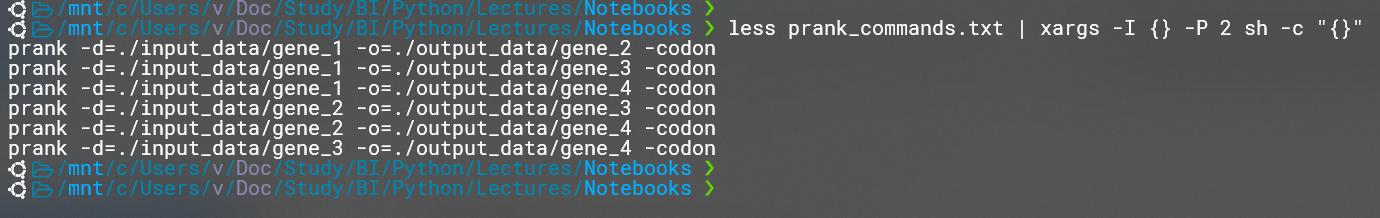

Что делать если вы хотите запихать всякую разную обработку разными скриптами? Просто напишите bash скрипт с приемом аргументов!

1. Какой-то скрипт на питоне

In [224]:
%%file python_script.py

import argparse
import random

parser = argparse.ArgumentParser()
parser.add_argument('positional')

if __name__ == '__main__':
    number = random.randint(1,10)
    print(number)
    data = parser.parse_args().positional
    result = 'AAAAA' + data + '_' + str(number)
    print(result)

Overwriting python_script.py


2. Какой-то скрипт на баше который в том числе запускает скрипт на питоне

In [225]:
%%file bash_script.sh

input_path=$1
output_path=$2

cmd=$(wc -c < prank_commands.txt)
python ./python_script.py $cmd

Overwriting bash_script.sh


3. Создаем комманды

In [226]:
input_dir = './input_data/'
output_dir = './output_data/'

with open('prank_commands_2.txt', 'w') as file:
    for g1, g2 in make_pairs(genes):
        input_path = input_dir + g1
        output_path = output_dir + g2

        command = f"bash ./bash_script.sh {input_path} {output_path}"
        print(command)
        file.write(command + '\n')

bash ./bash_script.sh ./input_data/gene_1 ./output_data/gene_2
bash ./bash_script.sh ./input_data/gene_1 ./output_data/gene_3
bash ./bash_script.sh ./input_data/gene_1 ./output_data/gene_4
bash ./bash_script.sh ./input_data/gene_2 ./output_data/gene_3
bash ./bash_script.sh ./input_data/gene_2 ./output_data/gene_4
bash ./bash_script.sh ./input_data/gene_3 ./output_data/gene_4


4. Осталось запустить!

`less prank_commands_2.txt | xargs -I {} -P 2 sh -c "{}"`

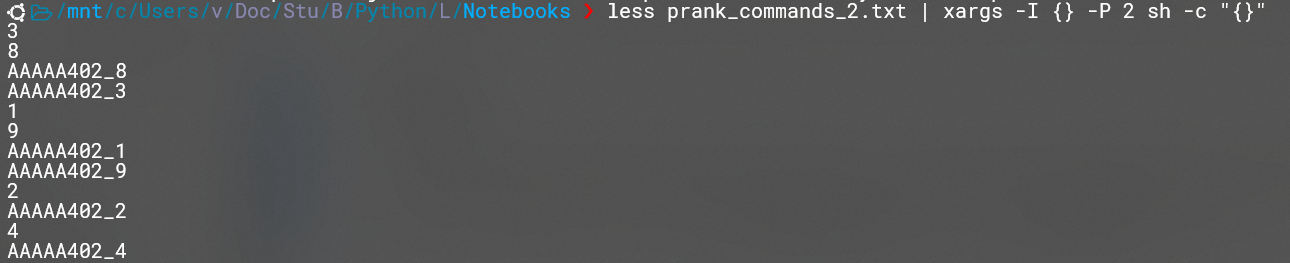

В этом плане `.sh` скрипты очень удобны для параллеливания. Это примерно то же самое когда мы в python чтобы что угодно распараллелить - собираем это в функцию.

Содержание же функции/скрипта может быть каким угодно с какой угодно логикой. Создание файлов, удаление, вычисления, походы в инет.... Всё что вам надо.

Только следите за тем чтобы не было такого чтобы разные потоки неожиданно для вас могли писать и читать одни и те же данные.

# Итоги

В каждом разделе мы уже проговорили более чем достаточно для общего понимания происходящего. Всё это только верхушка айсберга и в каждой из рассмотренных библиотек есть низкоуровневые функции, которые позволяют с головой закопаться в то, как это всё работает.

Зачастую, для любых задач с головой хватает **multiprocessing** (для CPU bound) и **threading** (для IO bound)./